# Exercise: The Wrath of Tufte

 We have in other sections discussed some principles of data communication, emphasizing some of the principles in Edward Tufte's *The Visual Display of Quantitative Information*. In this Exercise, we will implement some code to simulate how sampling depth (i.e. the number of DNA sequences collected per sample) influences the observed alpha diversity of a microbiome. Then we will create a graph of this data that violates as many of Tufte's principles simultaneously. Here's a sneak peak of three graphs:

<img src="./rarefaction_1000.png" alt="An explosion of garish color. Squinting, a viewer may see a line graph with sequencing depth on the x-axis and observed species richness on the y-axis. But the graph is a mess — random sized x and y axis fonts; heavy yellow gridlines overlayed over the whole thing; the area between the line and the x-axis filled in with black and red stars on a deep purble background; a thick yellow dot dashed line for the line plot, etc" width="400">


Your goal will be to revise this graph into something more sensible. If you like, you can skip directly to the graphing code in the make_rarefaction_graph function. *Hint*: simply deleting some of the code and parameters that make the graph so horrible will get you at least part of the way there.







In [2]:
# Importing libraries and functions we'll need

%matplotlib inline
from random import choice
from collections import defaultdict
import matplotlib.pyplot as plt
from math import log

## Set up the input data for the graph

 The goal of our graph is to convey how different sampling depths change the perceived complexity or richness of a microbial community. To do that, we must first represent the whole community (i.e. the biological truth), and then simulate the effect of drawing random samples of various sizes from that community (i.e. observations that approximate what's in the full community with varying degrees of error).

 #### Define a function to simulate a 'true' microbiome
 First let's define a function to generate the 'true' microbiome in our simulation. We'll want our microbiome — like many real microbial communities — to have members with varying abundances. A few may be quite common, but many diverse microbes will be very rare.

In [3]:
def make_microbiome(total=10000000,common=0.70,uncommon=0.25,rare=0.04,very_rare=0.004,\
    uber_rare=0.0004,most_rare=0.00001):
    """Return a simulated microbiome as a list of species
    NOTE: this is just a simple demo real simulations would use a 
    specific distribution of rare vs. abundant species
    
    """
    microbiome = ['species1']*int(common*total)+\
      ['species2']*int(uncommon*total)+\
      ['species3']*int(rare*total)+\
      ['species4']*int(very_rare*total)+\
      ['species5']*int(very_rare*total)+\
      ['species6']*int(uber_rare*total)+\
      ['species7']*int(uber_rare*total)+\
      ['species8']*int(uber_rare*total)+\
      ['species9']*int(uber_rare*total)+\
      ['species10']*int(uber_rare*total)+\
      ['species11']*int(most_rare*total)
    
    return microbiome

#### Define a function to sample from the 'true' microbiome to produce observations

In biology, we almost never get to enumerate an entire microbial community. Instead, we have observations that represent samples from the true biological population. We can simulate that process in python by using the choice function to repeatedly draw a certain number of microbes from the true community that we simulated. This represents what DNA sequences we might see if doing a marker gene study with a particular sampling depth on the true community.

In [4]:
def sample_microbiome(microbiome,depth):
    """Return a dict of species:count by selection species at random from a list of species
    microbiome -- a list of strings representing species 
      example: ['species1','species1','species1','species2', etc]
    depth -- depth to sample as int
    """
    counts = defaultdict(int)
    for i in range(depth):
        read = (choice(microbiome)) 
        counts[read] += 1
    return counts

#### Define a function to count observed species from a dict

Our sample function returns a `dict` object that connects each species (the keys of our `dict`) to the number of times that species was observed (the values of the `dict`).

The length of a dictionary is the same as the number of items in the dict, so calling `len` on the counts dict will get us the number of observed species:

In [5]:
def obs_species(counts):
    """Returns the number of observed species
    counts -- defaultdict of species counts"""
    return(len(counts))

## Graph the Data

Now we need to graph the observed species richness of our sample at varying levels of sequencing depth. This particular graphing code has horrible, no-good, very bad styling — styling that will attract The Wrath of Tufte. Hopefully, you will hopefully be able to adjust this graph to make it better. 

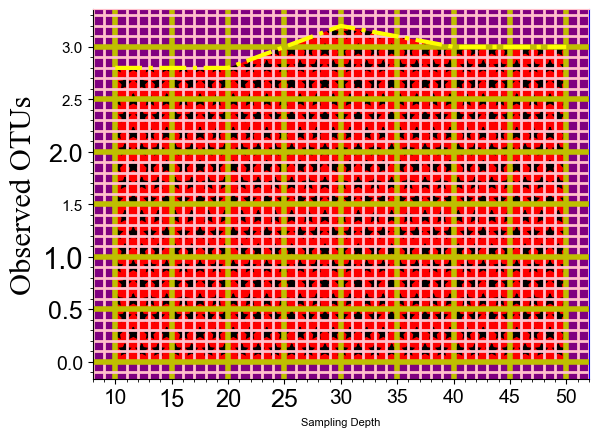

Outputing chart: rarefaction_50


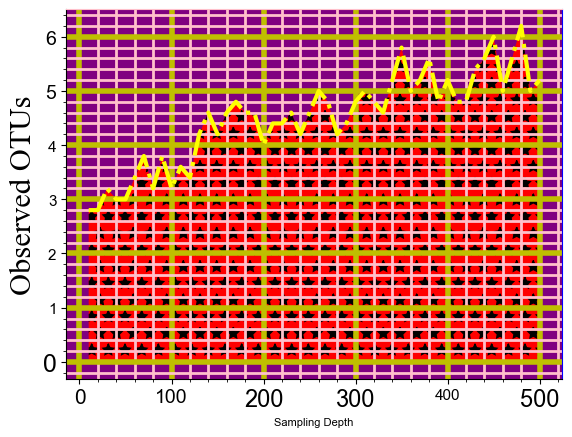

Outputing chart: rarefaction_500


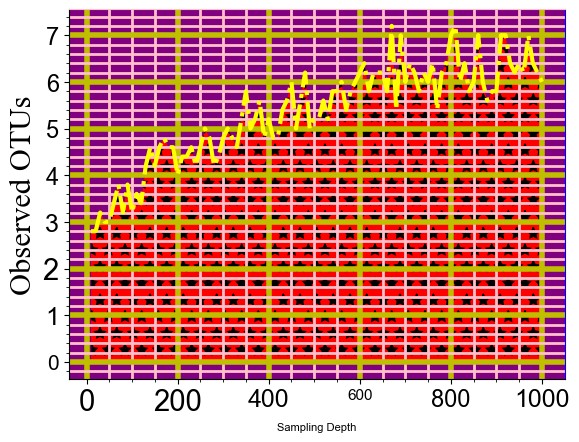

Outputing chart: rarefaction_1000


In [7]:
def rarefaction_graph(x,y,outfile="rarefaction.png",fontsize=16,font="Arial"):
    """Graph species vs. sampling effort
    x -- a list of x values
    y -- a list of y values
    outfile -- path to save the graph.  Note that the .png extension is important, as matplotlib 
    guesses output filetype based on suffix

    Hat tip to Stack Overflow on an elegant stategy for adjusting font sizes: 
    http://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
    """
    ax =plt.subplot()
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname(font)
        #Randomly adjust the label size 
        label.set_fontsize(fontsize + choice(([5,2,1,-1,-2,-5]))) 

    # Set the font dictionaries (for plot title and axis titles)
    title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} 
    
    #It would be boring to have the x and y axis in the same font
    x_axis_font = {'fontname':'Arial', 'size':'8'}
    y_axis_font = {'fontname':'Times New Roman', 'size':'22'}
    
    #Plot the results with a nice thick yellow dot-dashed line
    plt.plot(x,y,c='yellow',linestyle='-.',linewidth=3.0)
    
    #Add heavy black and yellow gridlines
    plt.grid(which='major', color='y', linestyle='-',linewidth=4.0)
    
    #Turn on minor ticks so you can see our minor gridlines
    plt.minorticks_on()
    
    #Now make some beautfiful thick minor gridlines
    plt.grid(which='minor', color='pink', linestyle='-',linewidth=2.0)
 
    #No need to set consistent y-axis limits
    #so graphs can be compared - readers will figure it out
    
    #ax.set_ylim([0,12])

    #Fill the area between the line and the x-axis with a star pattern
    ax.fill_between(x,y, hatch='*',facecolor='r',edgecolor='none')
    
    #Change two axes to be colorful
    ax.spines['top'].set_color('pink') 
    ax.spines['right'].set_color('blue')
    
    #Set the background color
    ax.set_facecolor('purple')
    
    #Show ticks just on bottom left
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    #Set unique font styles for x and y axis
    plt.ylabel('Observed OTUs',**y_axis_font)
    plt.xlabel('Sampling Depth',**x_axis_font)
    plt.savefig(outfile)
    plt.show()

if __name__ == "__main__":
    #This script simulates sampling from microbiomes of various
    #depths, then makes horrible graphs representing them.
    #Your task is to fix the rarefaction_graph function so that 
    #the graphs are less awful.

    #Generate a list of strings representing a microbiome
    microbiome = make_microbiome(total=1000000)
    
    
    graph_depths = [50,500,1000,50]
    sampling_depths = range(10,1010,10)
    x = []
    y = []
    iterations = 5
    for sampling_depth in sampling_depths: 
        curr_counts = []
        for i in range(iterations):
            microbiome_sample = sample_microbiome(microbiome,sampling_depth)
            curr_count = obs_species(microbiome_sample)
            curr_counts.append(curr_count)
        counts = sum(curr_counts)/len(curr_counts)
        x.append(sampling_depth)
        y.append(counts)
        if sampling_depth in graph_depths:
            rarefaction_graph(x,y,outfile="rarefaction_%i"%sampling_depth)
            print("Outputing chart: rarefaction_%i"%sampling_depth) 

# Exercises

1. **What principles for the visual display of quantitative information do our graphs violate?**


2. **Revise the chart** to better display the data, and save your code.  


3. Using your revised graphs as a reference, **answer the following**. You are reading an older publication that found a two-fold difference in species richness between two environments, A and B, with B having about double the observed species diversity of A. However, there is a difference in average sequencing depth between the two: A has on average only 50 sequences per sample, while B  has about 1000. From this information, what can you conclude about the species richness of the real biological communities in environment A and B?  


4. Aside from the formatting details, **do you think there are aspects of the simulation or overall graphing approach that would better communicate how sequencing depth (the number of DNA sequences collected per sample)
affects perceived microbiome diversity?**

5. Try implementing one of your ideas from Exercise 4, and compare your rewritten version to the revised chart in step 2. Did it improve matters? Were there tradeoffs in what you were showing?
